# Supervised Learning with scikitlearn

### Classification

In [196]:
from sklearn import datasets

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression, ElasticNet
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import scale, StandardScaler

from scipy.stats import randint

In [2]:
plt.style.use("ggplot")

In [3]:
iris = datasets.load_iris()

In [4]:
type(iris)

sklearn.utils.Bunch

In [5]:
print(iris.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [6]:
print(type(iris.DESCR))
print(type(iris.feature_names))
print(type(iris.filename))

<class 'str'>
<class 'list'>
<class 'str'>


In [7]:
iris.filename

'C:\\Users\\Denis\\anaconda3\\lib\\site-packages\\sklearn\\datasets\\data\\iris.csv'

In [8]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [10]:
type(iris.data)

numpy.ndarray

In [11]:
type(iris.target)

numpy.ndarray

In [12]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [13]:
iris.data.shape

(150, 4)

In [14]:
x = iris.data
y = iris.target
df_iris = pd.DataFrame(x, columns = iris.feature_names)

In [15]:
df_iris.shape

(150, 4)

In [16]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Let us import another dataset that we will make use of.

In [17]:
df_votes = pd.read_csv("house_votes.csv", header = None)

In [18]:
df_votes.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [19]:
df_votes.shape

(435, 17)

It is missing some values (indicated by "?") and also lacks column names. Let us fix that.

In [20]:
df_votes.columns = ["party", "infants", "water", "budget", "physician", "salvador",\
                    "religious", "satellite", "aid", "missile", "immirgation", "synfuels",\
                    "education", "superfund", "crime", "duty_free_exports", "eaa_rsa"]

In [21]:
df_votes.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immirgation,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [22]:
df_votes.replace({'infants': {'n': 0, 'y': 1}})

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immirgation,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,0,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,0,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,0,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,1,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,republican,0,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y
431,democrat,0,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y
432,republican,0,?,n,y,y,y,n,n,n,n,y,y,y,y,n,y
433,republican,0,n,n,y,y,y,?,?,?,?,n,y,y,y,n,y


Ideally, we want to replace the values for all columns.

In [23]:
for column in df_votes.columns:
    df_votes = df_votes.replace({column: {'n': 0, 'y': 1}})

In [24]:
df_votes.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immirgation,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,0,1,0,1,1,1,0,0,0,1,?,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,?
2,democrat,?,1,1,?,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,?,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,?,1,1,1,1


Let us also take care of the missing values.

In [25]:
df_votes = df_votes.replace("?", np.nan)

In [26]:
df_votes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   party              435 non-null    object 
 1   infants            423 non-null    float64
 2   water              387 non-null    float64
 3   budget             424 non-null    float64
 4   physician          424 non-null    float64
 5   salvador           420 non-null    float64
 6   religious          424 non-null    float64
 7   satellite          421 non-null    float64
 8   aid                420 non-null    float64
 9   missile            413 non-null    float64
 10  immirgation        428 non-null    float64
 11  synfuels           414 non-null    float64
 12  education          404 non-null    float64
 13  superfund          410 non-null    float64
 14  crime              418 non-null    float64
 15  duty_free_exports  407 non-null    float64
 16  eaa_rsa            331 non

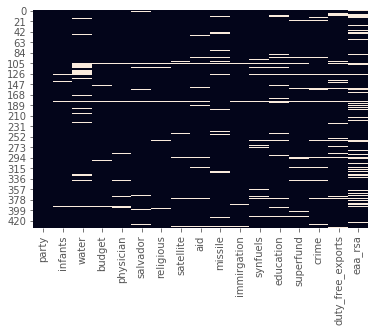

In [27]:
sns.heatmap(df_votes.isnull(), cbar=False)
plt.show()

In [28]:
df_votes = df_votes.dropna()

In [29]:
df_votes.shape

(232, 17)

In [30]:
df_votes.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immirgation,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
8,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
19,democrat,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
23,democrat,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
25,democrat,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


Let us examine the values for some of the columns.

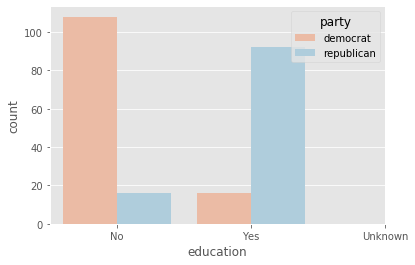

In [31]:
plt.figure()
sns.countplot(x='education', hue='party', data=df_votes, palette='RdBu')
plt.xticks([0,1,2], ['No', 'Yes', 'Unknown'])
plt.show()

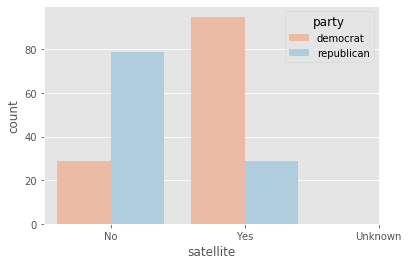

In [32]:
plt.figure()
sns.countplot(x='satellite', hue='party', data=df_votes, palette='RdBu')
plt.xticks([0,1,2], ['No', 'Yes', 'Unknown'])
plt.show()

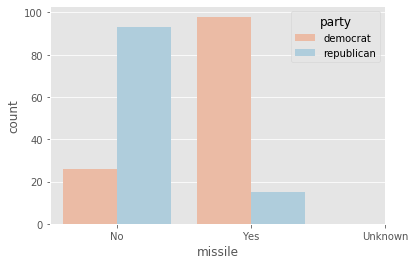

In [33]:
plt.figure()
sns.countplot(x='missile', hue='party', data=df_votes, palette='RdBu')
plt.xticks([0,1,2], ['No', 'Yes', 'Unknown'])
plt.show()

### Building a KNN classifier

We will go back to the iris dataset.

In [34]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [35]:
knn = KNeighborsClassifier(n_neighbors = 6)

In [36]:
iris["data"]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [37]:
iris["target"]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [38]:
knn.fit(iris["data"], iris["target"])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [39]:
X_new = np.array([[5.6, 2.8, 3.9, 1.1],
                 [5.7, 2.6, 3.8, 1.3],
                 [4.7, 3.2, 1.3, 0.2]])

In [40]:
prediction = knn.predict(X_new)

In [41]:
print("Prediction {}".format(prediction))

Prediction [1 1 0]


Let us repeat the process with an exercise:

In [42]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Create arrays for the features and the response variable
y = df_votes['party'].values
X = df_votes.drop('party', axis=1).values

# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors = 6)

# Fit the classifier to the data
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

Building up on what we'v already done, let us now predict an outcome given new data:

In [43]:
X_new = np.array([[0.6964691855978616,
  0.28613933495037946,
  0.2268514535642031,
  0.5513147690828912,
  0.7194689697855631,
  0.42310646012446096,
  0.9807641983846155,
  0.6848297385848633,
  0.48093190148436094,
  0.3921175181941505,
  0.3431780161508694,
  0.7290497073840416,
  0.4385722446796244,
  0.05967789660956835,
  0.3980442553304314,
  0.7379954057320357]])

In [44]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier 

# Create arrays for the features and the response variable
y = df_votes['party'].values
X = df_votes.drop('party', axis=1).values

# Create a k-NN classifier with 6 neighbors: knn
knn = KNeighborsClassifier(n_neighbors = 6)

# Fit the classifier to the data
knn.fit(X, y)

# Predict the labels for the training data X
y_pred = knn.predict(X)

# Predict and print the label for the new data point X_new
new_prediction = knn.predict(X_new)
print("Prediction: {}".format(new_prediction))

Prediction: ['democrat']


Continuing with measuring the model performance:

In [45]:
# Import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt

# Load the digits dataset: digits
digits = datasets.load_digits()

In [46]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [47]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [48]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [49]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [50]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [51]:
digits.images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

In [52]:
digits.DESCR

".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixel

<built-in method keys of Bunch object at 0x000002B7D9060948>
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping bloc

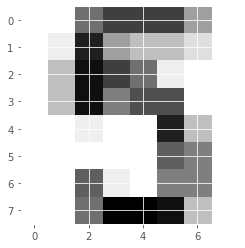

In [53]:
# Print the keys and DESCR of the dataset
print(digits.keys)
print(digits.DESCR)

# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)

# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

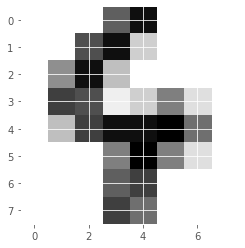

In [54]:
plt.imshow(digits.images[110], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [55]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [56]:
# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify = y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.9833333333333333


Let us also check for overfitting and underfitting and plot them on a "Model Complexity Curve".

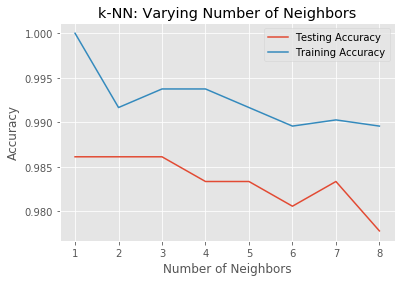

In [57]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors = k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

### Regression

Let us begin with an example, looking at the Boston housing market dataset.

In [58]:
boston_df = pd.read_csv("boston.csv")

In [59]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [60]:
boston_df.shape

(506, 14)

In [61]:
X = boston_df.drop("MEDV", axis = 1).values

In [62]:
y = boston_df["MEDV"].values

In [63]:
X[:,5][:5]

array([6.575, 6.421, 7.185, 6.998, 7.147])

In [64]:
X_rooms = X[:,5]

In [65]:
type(X_rooms)

numpy.ndarray

In [66]:
X_rooms.shape

(506,)

In [67]:
y.shape

(506,)

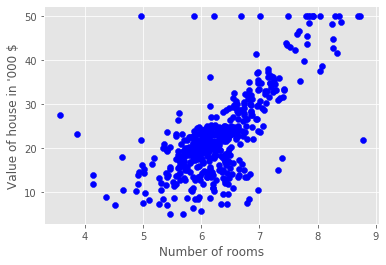

In [68]:
plt.scatter(X_rooms, y, color = "blue")

plt.ylabel("Value of house in '000 $")
plt.xlabel("Number of rooms")

plt.show()

In [69]:
reg = LinearRegression()

In [70]:
y = y.reshape(-1, 1)
X_rooms = X_rooms.reshape(-1, 1)

In [71]:
reg.fit(X_rooms, y)
prediction_space = np.linspace(min(X_rooms), max(X_rooms)).reshape(-1, 1)

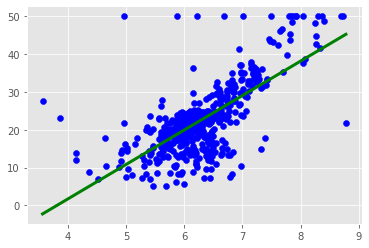

In [72]:
plt.scatter(X_rooms, y, color = "blue")
plt.plot(prediction_space, reg.predict(prediction_space), color = "green", linewidth = 3)
plt.show()

Let us do another example.

In [73]:
# Read the CSV file into a DataFrame: df
gm_df = pd.read_csv("gm_2008_region.csv")
gm_df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


Let us examine the effect of fertility only on life expectancy.

In [74]:
# Create arrays for features and target variable
y = gm_df["life"].values
X = gm_df["fertility"].values

# Print the dimensions of X and y before reshaping
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X.shape))
print(y)
print(X)

Dimensions of y before reshaping: (139,)
Dimensions of X before reshaping: (139,)
[75.3 58.3 75.5 72.5 81.5 80.4 70.6 72.2 68.4 75.3 70.1 79.4 70.7 63.2
 67.6 70.9 61.2 73.9 73.2 59.4 57.4 66.2 56.6 80.7 54.8 78.9 75.1 62.6
 58.6 79.7 55.9 76.5 77.8 78.7 61.  74.  70.1 74.1 56.7 60.4 74.  65.7
 79.4 81.  57.5 62.2 72.1 80.  62.7 79.5 70.8 58.3 51.3 63.  61.7 70.9
 73.8 82.  64.4 69.5 76.9 79.4 80.9 81.4 75.5 82.6 66.1 61.5 72.3 77.6
 45.2 61.  72.  80.7 63.4 51.4 74.5 78.2 55.8 81.4 63.6 72.1 75.7 69.6
 63.2 73.3 55.  60.8 68.6 80.3 80.2 75.2 59.7 58.  80.7 74.6 64.1 77.1
 58.2 73.6 76.8 69.4 75.3 79.2 80.4 73.4 67.6 62.2 64.3 76.4 55.9 80.9
 74.8 78.5 56.7 55.  81.1 74.3 67.4 69.1 46.1 81.1 81.9 69.5 59.7 74.1
 60.  71.3 76.5 75.1 57.2 68.2 79.5 78.2 76.  68.7 75.4 52.  49. ]
[2.73 6.43 2.24 1.4  1.96 1.41 1.99 1.89 2.38 1.83 1.42 1.82 2.91 5.27
 2.51 3.48 2.86 1.9  1.43 6.04 6.48 3.05 5.17 1.68 6.81 1.89 2.43 5.05
 5.1  1.91 4.91 1.43 1.5  1.89 3.76 2.73 2.95 2.32 5.31 5.16 1.62 2.74

In [75]:
# Reshape X and y
y = y.reshape(-1, 1)
X = X.reshape(-1, 1)

# Print the dimensions of X and y after reshaping
print("Dimensions of y after reshaping: {}".format(y.shape))
print("Dimensions of X after reshaping: {}".format(X.shape))
print(y[:5])
print(X[:5])

Dimensions of y after reshaping: (139, 1)
Dimensions of X after reshaping: (139, 1)
[[75.3]
 [58.3]
 [75.5]
 [72.5]
 [81.5]]
[[2.73]
 [6.43]
 [2.24]
 [1.4 ]
 [1.96]]


Let us check the correlations between all columns in the dataset.

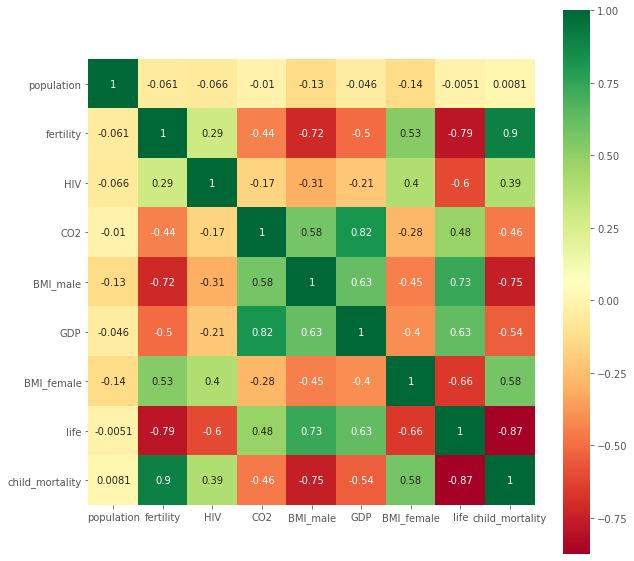

In [76]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(gm_df.corr(), square=True, cmap='RdYlGn', annot=True, ax=ax)
plt.show()

Let us split the dataset into training and testing sets, and then fit and predict a linear regression over all features. In addition to computing the R2 score, we will also compute the Root Mean Squared Error (RMSE), which is another commonly used metric to evaluate regression models.

0.6192442167740035


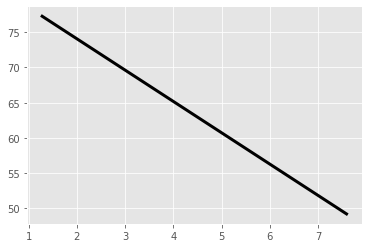

In [77]:
# Create the prediction space
prediction_space = np.linspace(min(X), max(X)).reshape(-1,1)

# Fit the model to the data
reg.fit(X, y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print(reg.score(X, y))

# Plot regression line
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.show()


In [78]:
gm_df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [79]:
gm_df_reg = gm_df.drop("Region", axis = 1)
y = np.array(gm_df_reg["life"].values)
X = np.array(gm_df_reg.drop("life", axis = 1).values)
print(y)
print(X)

[75.3 58.3 75.5 72.5 81.5 80.4 70.6 72.2 68.4 75.3 70.1 79.4 70.7 63.2
 67.6 70.9 61.2 73.9 73.2 59.4 57.4 66.2 56.6 80.7 54.8 78.9 75.1 62.6
 58.6 79.7 55.9 76.5 77.8 78.7 61.  74.  70.1 74.1 56.7 60.4 74.  65.7
 79.4 81.  57.5 62.2 72.1 80.  62.7 79.5 70.8 58.3 51.3 63.  61.7 70.9
 73.8 82.  64.4 69.5 76.9 79.4 80.9 81.4 75.5 82.6 66.1 61.5 72.3 77.6
 45.2 61.  72.  80.7 63.4 51.4 74.5 78.2 55.8 81.4 63.6 72.1 75.7 69.6
 63.2 73.3 55.  60.8 68.6 80.3 80.2 75.2 59.7 58.  80.7 74.6 64.1 77.1
 58.2 73.6 76.8 69.4 75.3 79.2 80.4 73.4 67.6 62.2 64.3 76.4 55.9 80.9
 74.8 78.5 56.7 55.  81.1 74.3 67.4 69.1 46.1 81.1 81.9 69.5 59.7 74.1
 60.  71.3 76.5 75.1 57.2 68.2 79.5 78.2 76.  68.7 75.4 52.  49. ]
[[3.4811059e+07 2.7300000e+00 1.0000000e-01 ... 1.2314000e+04
  1.2990490e+02 2.9500000e+01]
 [1.9842251e+07 6.4300000e+00 2.0000000e+00 ... 7.1030000e+03
  1.3012470e+02 1.9200000e+02]
 [4.0381860e+07 2.2400000e+00 5.0000000e-01 ... 1.4646000e+04
  1.1889150e+02 1.5400000e+01]
 ...
 [8.658934

In [80]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))


R^2: 0.8380468731430135
Root Mean Squared Error: 3.2476010800369455


Cross validation serves a similar purpose to the model complexity curve - it gives us indication of our model performance. To do cross validation, we simply split our data in an n number of folds and perform train/test on all but one of the folds.

In [81]:
reg = LinearRegression()

cv_results = cross_val_score(reg, X, y, cv = 5)

In [82]:
print(cv_results)

[0.81720569 0.82917058 0.90214134 0.80633989 0.94495637]


In [85]:
print("Average 5-Fold CV Score: {}".format(np.mean(cv_results)))

Average 5-Fold CV Score: 0.8599627722793505


Let us see the difference in computational resources based on 3 and 10 fold cross validation.

In [87]:
%timeit cv_results = cross_val_score(reg, X, y, cv = 3)

3.83 ms ± 161 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [86]:
%timeit cv_results = cross_val_score(reg, X, y, cv = 30)

37.2 ms ± 3.07 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Now we will talk about regularized regression - we will look at Ridge and Lasso methods.

In [89]:
ridge = Ridge(alpha = 0.1, normalize = True)

In [90]:
ridge.fit(X_train, y_train)
ridge_predict = ridge.predict(X_test)
ridge.score(X_test, y_test)

0.8442469959975749

In [93]:
# Setup arrays to store train and test R-squared
alphas = np.arange(0, 1, 0.05)
train_rsquared = np.empty(len(alphas))
test_rsquared = np.empty(len(alphas))

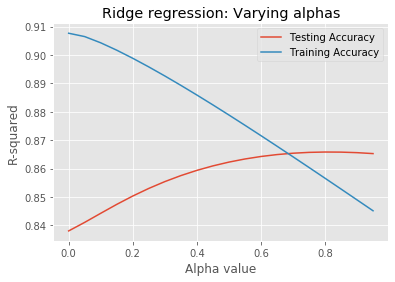

In [95]:
# Loop over different values of alpha
for i, k in enumerate(alphas):
    # Setup a Ridge regression 
    ridge = Ridge(alpha = k, normalize = True)

    # Fit the classifier to the training data
    ridge.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_rsquared[i] = ridge.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_rsquared[i] = ridge.score(X_test, y_test)

# Generate plot
plt.title('Ridge regression: Varying alphas')
plt.plot(alphas, test_rsquared, label = 'Testing Accuracy')
plt.plot(alphas, train_rsquared, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Alpha value')
plt.ylabel('R-squared')
plt.show()

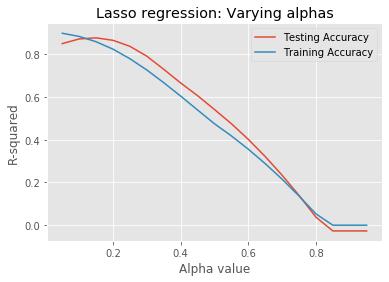

In [98]:
# Setup arrays to store train and test R-squared
alphas = np.arange(0.05, 1, 0.05)
train_rsquared = np.empty(len(alphas))
test_rsquared = np.empty(len(alphas))

# Loop over different values of alpha
for i, k in enumerate(alphas):
    # Setup a Ridge regression 
    lasso = Lasso(alpha = k, normalize = True)

    # Fit the classifier to the training data
    lasso.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_rsquared[i] = lasso.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_rsquared[i] = lasso.score(X_test, y_test)

# Generate plot
plt.title('Lasso regression: Varying alphas')
plt.plot(alphas, test_rsquared, label = 'Testing Accuracy')
plt.plot(alphas, train_rsquared, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Alpha value')
plt.ylabel('R-squared')
plt.show()

We can also check the coefficients of the independent variables of our model.

In [104]:
gm_df_reg.drop("life", axis = 1)

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,child_mortality
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,29.5
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,192.0
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,15.4
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,20.0
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,5.2
...,...,...,...,...,...,...,...,...
134,3350832.0,2.11,0.5,2.489764,26.39123,15317.0,124.2604,13.0
135,26952719.0,2.46,0.1,4.476669,25.32054,3733.0,124.3462,49.2
136,86589342.0,1.86,0.4,1.479347,20.91630,4085.0,121.9367,26.2
137,13114579.0,5.88,13.6,0.148982,20.68321,3039.0,132.4493,94.9


In [105]:
gm_df_reg.drop("life", axis = 1).columns

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'child_mortality'],
      dtype='object')

In [110]:
names = gm_df_reg.drop("life", axis = 1).columns

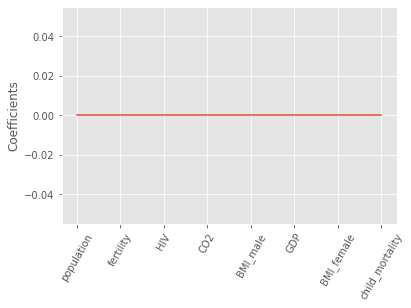

In [111]:
lasso_coeff = lasso.fit(X_train, y_train).coef_

plt.plot(range(len(names)), lasso_coeff)
plt.xticks(range(len(names)), names, rotation = 60)
plt.ylabel("Coefficients")
plt.show()

Let us get back to Ridge one more time.

In [112]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

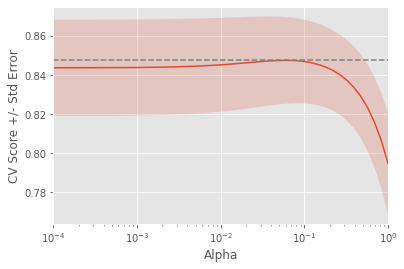

In [116]:
# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize = True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv = 10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)

### Fine-tuning our Model

#### Class imbalance

Let us go through some additional measures of performance besides accuracy.

In [117]:
pima_df = pd.read_csv("diabetes.csv")
pima_df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [118]:
pima_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [121]:
pima_df.shape

(768, 9)

In [123]:
y = pima_df["diabetes"].values
y.shape

(768,)

In [124]:
X = pima_df.drop("diabetes", axis = 1).values
X.shape

(768, 8)

In [125]:
# Create training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Instantiate a k-NN classifier: knn
knn = KNeighborsClassifier(n_neighbors = 6)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[176  30]
 [ 56  46]]
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       206
           1       0.61      0.45      0.52       102

    accuracy                           0.72       308
   macro avg       0.68      0.65      0.66       308
weighted avg       0.71      0.72      0.71       308



#### ROC curve

In [129]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Create the classifier: logreg
logreg = LogisticRegression(max_iter = 1000)

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[168  38]
 [ 36  66]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       206
           1       0.63      0.65      0.64       102

    accuracy                           0.76       308
   macro avg       0.73      0.73      0.73       308
weighted avg       0.76      0.76      0.76       308



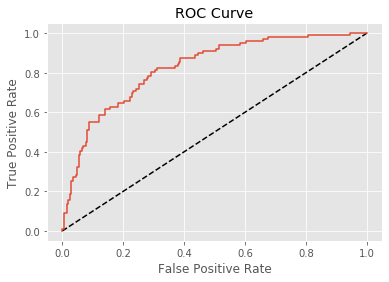

In [130]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [132]:
roc_auc_score(y_test, y_pred_prob)

0.8242908814011042

In [133]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC: 0.8242908814011042
AUC scores computed using 5-fold cross-validation: [0.81240741 0.80777778 0.82555556 0.87283019 0.84471698]


#### Hyperparameter tuning

In [136]:
# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression(max_iter = 1000)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 0.006105402296585327}
Best score is 0.7734742381801205


In [144]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))


Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 6, 'min_samples_leaf': 8}
Best score is 0.7448433919022154


In [147]:
# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression(max_iter = 1000, solver = 'liblinear')

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the training data
logreg_cv.fit(X_train, y_train)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameter: {'C': 3.727593720314938, 'penalty': 'l2'}
Tuned Logistic Regression Accuracy: 0.7608695652173914


In [158]:
# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Create the hyperparameter grid
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}

# Instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet(max_iter = 100, tol = 1)

# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)

# Fit it to the training data
gm_cv.fit(X_train, y_train)

# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))

Tuned ElasticNet l1 ratio: {'l1_ratio': 0.20689655172413793}
Tuned ElasticNet R squared: 0.23592694072711293
Tuned ElasticNet MSE: 0.16923915417273047


#### Preprocessing and pipelines

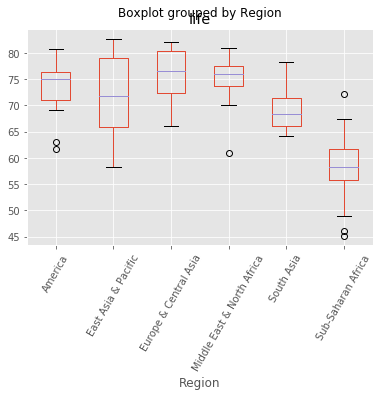

In [161]:
# Read 'gapminder.csv' into a DataFrame: df
df = pd.read_csv('gm_2008_region.csv')

# Create a boxplot of life expectancy per region
df.boxplot("life", "Region", rot=60)

# Show the plot
plt.show()

In [163]:
# Create dummy variables: df_region
df_region = pd.get_dummies(df)

# Print the columns of df_region
print(df_region.columns)

# Create dummy variables with drop_first=True: df_region
df_region = pd.get_dummies(df, drop_first = True )

# Print the new columns of df_region
print(df_region.columns)
print(df.columns)

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_America',
       'Region_East Asia & Pacific', 'Region_Europe & Central Asia',
       'Region_Middle East & North Africa', 'Region_South Asia',
       'Region_Sub-Saharan Africa'],
      dtype='object')
Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_East Asia & Pacific',
       'Region_Europe & Central Asia', 'Region_Middle East & North Africa',
       'Region_South Asia', 'Region_Sub-Saharan Africa'],
      dtype='object')
Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region'],
      dtype='object')


In [164]:
# Instantiate a ridge regressor: ridge
ridge = Ridge(alpha = 0.5, normalize = True)

# Perform 5-fold cross-validation: ridge_cv
ridge_cv = cross_val_score(ridge, X, y, cv = 5)

# Print the cross-validated scores
print(ridge_cv)

[0.26648172 0.23084647 0.27355543 0.24898795 0.25673452]


Let us practice dropping some data.

In [165]:
df = pd.read_csv("house_votes.csv")

In [167]:
df_votes = pd.read_csv("house_votes.csv", header = None)

In [169]:
df_votes.columns = ["party", "infants", "water", "budget", "physician", "salvador",\
                    "religious", "satellite", "aid", "missile", "immirgation", "synfuels",\
                    "education", "superfund", "crime", "duty_free_exports", "eaa_rsa"]

In [170]:
df_votes.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immirgation,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [171]:
# Convert '?' to NaN
df[df == '?'] = np.nan

# Print the number of NaNs
print(df.isnull().sum())

# Print shape of original DataFrame
print("Shape of Original DataFrame: {}".format(df.shape))

# Drop missing values and print shape of new DataFrame
df = df.dropna()

# Print shape of new DataFrame
print("Shape of DataFrame After Dropping All Rows with Missing Values: {}".format(df.shape))

republican      0
n              12
y              48
n.1            11
y.1            11
y.2            15
y.3            11
n.2            14
n.3            15
n.4            22
y.4             7
?              20
y.5            31
y.6            25
y.7            17
n.5            28
y.8           104
dtype: int64
Shape of Original DataFrame: (434, 17)
Shape of DataFrame After Dropping All Rows with Missing Values: (232, 17)


In [186]:
# Setup the Imputation transformer: imp
imp = SimpleImputer(missing_values=np.NaN, strategy= "most_frequent")

# Instantiate the SVC classifier: clf
clf = SVC()

# Setup the pipeline with the required steps: steps
steps = [('imputation', imp),
        ('SVM', clf)]

In [187]:
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Fit the pipeline to the train set
pipeline.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = pipeline.predict(X_test)

# Compute metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.87      0.81       151
           1       0.66      0.49      0.56        80

    accuracy                           0.74       231
   macro avg       0.71      0.68      0.69       231
weighted avg       0.73      0.74      0.72       231



#### Centering and scaling

In [189]:
X_scaled = scale(X)

In [190]:
np.mean(X), np.std(X)

(44.98579117838542, 58.37297131925462)

In [192]:
np.mean(X_scaled), np.std(X_scaled)

(8.919369872314083e-17, 1.0)

We can also do scaling within a pipeline. We include the scaler in the pipeline and the rest of the steps are the same as before.

In [197]:
steps = [
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier())
]

pipeline = Pipeline(steps)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

knn_scaled = pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

accuracy_score(y_test, y_pred)

0.7012987012987013

Cross validation and scaling in a pipeline

In [200]:
steps = [
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier())
]

pipeline = Pipeline(steps)

parameters = {"knn__n_neighbors": np.arange(1, 50)}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

cv = GridSearchCV(pipeline, param_grid = parameters)

cv.fit(X_train, y_train)

y_pred = cv.predict(X_test)

print(cv.best_params_)
print(cv.score(X_test, y_test))
print(classification_report(y_test, y_pred))

{'knn__n_neighbors': 7}
0.696969696969697
              precision    recall  f1-score   support

           0       0.75      0.80      0.78       151
           1       0.57      0.50      0.53        80

    accuracy                           0.70       231
   macro avg       0.66      0.65      0.65       231
weighted avg       0.69      0.70      0.69       231



Let us bring it all together with a pipeline for classification.

In [202]:
# Setup the pipeline
steps = [("scaler", StandardScaler()),
         ("SVM", SVC())]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {"SVM__C":[1, 10, 100],
              "SVM__gamma":[0.1, 0.01]}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21)

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline, param_grid = parameters)

# Fit to the training set
cv.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))


Accuracy: 0.7532467532467533
              precision    recall  f1-score   support

           0       0.75      0.90      0.82        94
           1       0.78      0.52      0.62        60

    accuracy                           0.75       154
   macro avg       0.76      0.71      0.72       154
weighted avg       0.76      0.75      0.74       154

Tuned Model Parameters: {'SVM__C': 1, 'SVM__gamma': 0.01}


And also a pipeline for regression

In [206]:
# Setup the pipeline steps: steps
steps = [("imputation", SimpleImputer(missing_values=np.NaN, strategy="mean")),
         ("scaler", StandardScaler()),
         ("elasticnet", ElasticNet(max_iter = 100, tol = 1))]

# Create the pipeline: pipeline 
pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {"elasticnet__l1_ratio":np.linspace(0,1,30)}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

# Create the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(pipeline, param_grid = parameters)

# Fit to the training set
gm_cv.fit(X_train, y_train)

# Compute and print the metrics
r2 = gm_cv.score(X_test, y_test)
print("Tuned ElasticNet Alpha: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))


Tuned ElasticNet Alpha: {'elasticnet__l1_ratio': 0.0}
Tuned ElasticNet R squared: 0.22580169706747344
